# Thin thread simulation workflow

![thin-thread-w-Julia.png](thin-thread-w-Julia.png)

# Axes of Query Complexity

* **model transformation complexity** ranging from simple queries over Pearl’s causal hierarchy (association and intervention) to complex queries (multiple world counterfactuals)
* **simulation complexity**, ranging from unconditional (forward simulation) queries to conditional queries (inverse problem)
* **decision complexity**, ranging from simple decisions (compare A vs B) to sophisticated decisions “optimize f(x) subject to g(x) = 0, h(x) <= 0
* **intervention complexity**, In general, interventions that modify Petri nets are guaranteed to generate ODE's that preserve mass balance. Interventions that modify ODEs directly have no such guarantees.  As we explore additional queries in the ASKEM starter kit, we will likely need to represent interventions that directly modify the trajectories of the ODE's, which may result in further assumption violations. 
* **data complexity**.   Just as "no plan has survived contact with the enemy",  it may also be the case that "no model has survived contact with data". Unobserved confounding, missing data, and selection bias all threaten the validity of causal effect estimates.  Furthermore, when data come from different populations with different distributions over the same variables, care must be taken to avoid introducing bias.  By specifying queries that acknowledge these threats to validity, we can generate models that take these factors into account and apply formal causal reasoning to recover from the biases these threats may cause.



# ASKEM Starter Kit Questions

| Question | model complexity | simulation complexity | decision complexity | intervention complexity | query expression |
|-----------|--------------|-----------------|---------------------------|-------------------|------------------|
| What is the probability of staying under ICU capacity? | simple (no interventions) | intermediate (many forward simulations by sampling from prior distribution of parameters) | simple (no decisions)| simple (no intervention)| $$P(ICU < capacity)$$ |
What is the probability of staying under ICU capacity if we do intervention X? | intermediate (intervened model) | intermediate (many forward simulations by sampling from prior distribution of parameters) | simple (only one intervention) |  unspecified | $$P(ICU_{do(X)} < capacity)$$ |
| I can only do one, is A or B better? | intermediate (two intervened models) | intermediate (many forward simulations by sampling from prior distribution of parameters) | Simple (comparison of two alternatives) |depends on nature of A and B. | $$E[Y_{do(A)} - Y_{do(B)}] > 0$$ |
|Is there an intervention that will keep us under ICU capacity with probability $p$? | intermediate (many interventions) | intermediate (many forward simulations by sampling from prior distribution of parameters| sophisticated (search over decision space to find an intervention that satisfy ICU capacity constraint | unspecified |  $$\texttt{satisfy}_{x\in X}  P(ICU_{do(x)}) < capacity) > p$$|
| Is intervention $A$ or $B$ more likely to keep me under ICU capacity (simpler version of 3b)  | intermediate (two interventions) |intermediate (many forward simulations by sampling from prior distribution of parameters) | simple (comparison of two alternatives)n|depends on nature of A and B. | $$\frac{P(ICU_{do(A)} < capacity )}{P(ICU_{do(B)} < capacity )}$$  |
|When considering interventions $A,B,\ldots$ what is the minimum (maximum) “expense” that achieves goal $G$? (is this underspecified? probably:  what is the cost function? Shouldn’t we iterate with the user about this?) Are you specifying an optimization function or constraints – not the same thing.  Many of these questions have implicit conditions that need to become explicit | intermediate (many interventions) |intermediate (many forward simulations by sampling from prior distribution of parameters |sophisticated (optimization over decision space) | depends on nature of $A$, $B$, etc...| $$\begin{array}{rl}\texttt{minimize}_{x\in \{A,B,\ldots\}}& Cost(x) \\
\texttt{such that} & G_{do(x)} = 1\end{array}$$

| Question | model complexity | simulation complexity | decision complexity | intervention complexity | query expression |
|-----------|--------------|-----------------|---------------------------|-------------------|------------------|
| What is the probability of staying under ICU capacity? | simple (no interventions) | intermediate (many forward simulations by sampling from prior distribution of parameters) | simple (no decisions)| simple (no intervention)| $$P(ICU < capacity)$$ |
What is the probability of staying under ICU capacity if we do intervention X? | intermediate (intervened model) | intermediate (many forward simulations by sampling from prior distribution of parameters) | simple (only one intervention) |  depends on X | $$P(ICU_{do(X)} < capacity)$$ |
Given that we exceeded ICU capacity, what is the probability of staying under ICU capacity if we do intervention X? | intermediate (intervened model) | complex (requires soving an inverse problem) | simple (only one intervention) |  depends on X | $$P(ICU_{do(X)} < capacity | ICU)$$ |
|Given that we exceeded ICU capacity, is there an intervention that will keep us under ICU capacity with probability $p$? | intermediate (many interventions) | complex (requires solving an inverse problem)| sophisticated (search over decision space to find an intervention that satisfy ICU capacity constraint | unspecified |  $$\texttt{satisfy}_{x\in X}  P(ICU_{do(x)}) < capacity| ICU) < p$$|
| Given that we exceeded ICU capacity, when should we have intervened? | complex (requires stratification) |complex (requires solving an inverse problem) |  complex (search over many interventions) | complex (intervening on a trajectory) | $$\texttt{satisfy}_{x(t)\in X(T)}  P(ICU_{do(x(t))} < capacity| ICU)< p$$
| On average, how many fewer infections will there be if we imposed a mask mandate? | intermediate (two intervened models) | intermediate (many forward simulations by sampling from prior distribution of parameters) | Simple (comparison of two alternatives) |depends on how the mask mandate is implemented. | $$E[Infections_{do(mask mandate)} - Infections]$$ |
|Is there an intervention that will keep us under ICU capacity with probability $p$? | intermediate (many interventions) | intermediate (many forward simulations by sampling from prior distribution of parameters| sophisticated (search over decision space to find an intervention that satisfy ICU capacity constraint | unspecified |  $$\texttt{satisfy}_{x\in X}  P(ICU_{do(x)}) < capacity) < p$$|
| Is intervention $A$ or $B$ more likely to keep me under ICU capacity (simpler version of 3b)  | intermediate (two interventions) |intermediate (many forward simulations by sampling from prior distribution of parameters) | simple (comparison of two alternatives)n|depends on nature of A and B. | $$\frac{P(ICU_{do(A)} < capacity )}{P(ICU_{do(B)} < capacity )}$$  |
    |When considering interventions $A,B,\ldots$ what is the minimum (maximum) “expense” that achieves goal $G$? (is this underspecified? probably:  what is the cost function? Shouldn’t we iterate with the user about this?) Are you specifying an optimization function or constraints – not the same thing.  Many of these questions have implicit conditions that need to become explicit | intermediate (many interventions) |intermediate (many forward simulations by sampling from prior distribution of parameters |sophisticated (optimization over decision space) | depends on nature of $A$, $B$, etc...| $$\begin{array}{rl}\texttt{minimize}_{x\in \{A,B,\ldots\}}& Cost(x) \\
    \texttt{such that} & G_{do(x)} = 1\end{array}$$
| Everything else being equal, what interventions would have resulted in half as many deaths? | complex (requires stratification) |complex (requires solving an inverse problem) |  complex (search over many interventions) | complex (intervening on a trajectory) | $$\texttt{satisfy}_{x\in X}  P(\int_t deaths(t)_{do(x)}dt| deaths(t)) < \frac{1}{2}\int_t deaths(t)dt$$

In [9]:
from y0.dsl import (P,  Sum, Variable, Product)
from IPython.display import Latex

In [3]:
Infected = Variable('Infected')
Recovered = Variable('Recovered')
Vaccinated = Variable('Vaccinated')
Died = Variable('Died')

**What is the probability that an infected, vaccinated person recovers?**

In [4]:
P(Recovered |  Infected, Vaccinated)

P(Recovered | Infected, Vaccinated)

**What is the probability that an  infected, unvaccinated,person does not recover?** 

In [5]:
P(~Recovered |  Infected, ~Vaccinated)

P(+Recovered | Infected, +Vaccinated)

**What is the probability that an infected person would recover if they were vaccinated, but die if they were not vaccinated?**

In [6]:
P(Recovered @ Vaccinated, ~Recovered @ ~Vaccinated | Infected)

P(Recovered @ -Vaccinated, +Recovered @ +Vaccinated | Infected)

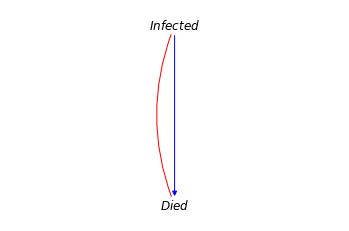

In [7]:
from y0.examples import id_sir_example, nonid_sir_example
nonid_sir_example.graph.draw()
from y0.algorithm.identify import Identification, identify, Unidentifiable


In [10]:
nonid_sir = Identification.from_expression(
    query=P[Infected](Died), 
    estimand=P(Infected, Died), 
    graph=nonid_sir_example.graph
)
try:
    identify(nonid_sir)
except Unidentifiable:
    display(nonid_sir.query.expression)
    display(Latex("is not identifiable given the model"))


P(Died @ -Infected)

<IPython.core.display.Latex object>

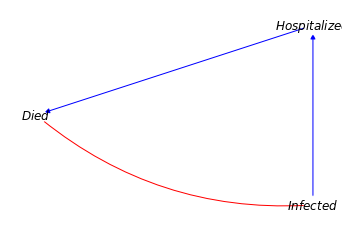

In [11]:
from y0.algorithm.identify import Identification, identify, Unidentifiable
from IPython.display import Latex, Markdown
from y0.dsl import P, Variable, Sum, Product

Infected, Died, Hospitalized = Variable("Infected"), Variable("Died"), Variable("Hospitalized")

id_sir = Identification.from_expression(
    query=P[Infected](Died), 
    estimand=P(Infected, Hospitalized, Died), 
    graph=id_sir_example.graph
)
id_sir.graph.draw()

In [12]:
estimand = identify(id_sir)
display(Latex(f"The query "), id_sir.query.expression, Latex(f"is identifiable and has estimand: "), estimand)

<IPython.core.display.Latex object>

P(Died @ -Infected)

<IPython.core.display.Latex object>

Sum[Hospitalized](P(Hospitalized | Infected) * Sum(Sum[Infected](P(Died | Hospitalized, Infected) * P(Infected))))

# Level 3 of Pearl's causal hierarchy (counterfactual)

Probability of sufficient causation.  If we observe $x$ and $y$ to be false, would $y$ be true if $x$ was forced to be true

In [ ]:
P(Y @ X | ~X, ~Y)

P(Y @ -X | +X, +Y)

Probability of necessary causation. If we observe $x$ and $y$ to be true, would $y$ be false if $x$ was forced to be false?

In [ ]:
P(~Y @ ~X | X, Y)

P(+Y @ +X | X, Y)

Probability of necessary and sufficent causation.  Triage: what is the probability that $y$ will live if I treat with $x$ and $y$ will die if I do not treat with $x$?

In [ ]:
P(Y @ X, ~Y @ ~X)

P(Y @ -X, +Y @ +X)

Multiple interventions

In [ ]:
P(A @ ~W @ X)

P(A @ (+W, -X))

$$E[Y_{do(A)} - Y_{do(\lnot A)}]$$

$$\sum_{y_{do(A)}\in dom(Y_{do(A)})}y_{do(A)}P(y_{do(A)}) - \sum_{y_{do(\lnot A)}\in dom(Y_{do(\lnot A)})}y_{do(\lnot A)}P(y_{do(\lnot A)})$$ 

In [ ]:
Sum[Y]((Y @ X )*P(Y @ X))

TypeError: unsupported operand type(s) for *: 'CounterfactualVariable' and 'Probability'